# Data Augmentation
### It is a set of techniques to artificially increase the amount of data by generating new data points from existing data.

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
from keras.preprocessing.image import ImageDataGenerator


In [8]:
# Defining a model
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (28, 28, 1)),
        layers.MaxPooling2D(pool_size = (2, 3)),
        layers.Flatten(),
        layers.Dense(30, activation = 'softmax'),
    ]
)

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Sclae the image to the range of [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Add a channel dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Split the training data into a training and validation set
x_train, x_valid = x_train[:-5000], x_train[-5000:]
y_train, y_valid = y_train[:-5000], y_train[-5000:]

11490434/11490434 [==============================] - 13s 1us/step


In [10]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = False,
    vertical_flip = False,
    fill_mode = 'nearest'
)

In [11]:
# Without data augmentation
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs = 5, validation_data = (x_valid, y_valid))

# With data augmentation
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history2 = model.fit(datagen.flow(x_train, y_train, batch_size = 32), epochs = 5, validation_data = (x_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2489 - accuracy: 0.9278 - val_loss: 0.0868 - val_accuracy: 0.9792
Epoch 2/5
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0902 - accuracy: 0.9738 - val_loss: 0.0683 - val_accuracy: 0.9812
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0691 - accuracy: 0.9794 - val_loss: 0.0643 - val_accuracy: 0.9818
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0583 - accuracy: 0.9822 - val_loss: 0.0552 - val_accuracy: 0.9854
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0495 - accuracy: 0.9853 - val_loss: 0.0550 - val_accuracy: 0.9858
Epoch 1/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2878 - accuracy: 0.9125 - val_loss: 0.1009 - val_accuracy: 0.9708
Epoch 2/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2024 - accuracy: 0.9399 - val_loss: 0.0762 - val_accuracy: 0.9800

In [18]:
model.evaluate(x_test, y_test, verbose = 2) # Without data augmentation
model.evaluate(datagen.flow(x_test, y_test, batch_size = 32), verbose = 2) # With data augmentation

313/313 - 0s - loss: 0.0973 - accuracy: 0.9705 - 346ms/epoch - 1ms/step
313/313 - 1s - loss: 0.1404 - accuracy: 0.9587 - 924ms/epoch - 3ms/step


[0.14038778841495514, 0.9587000012397766]

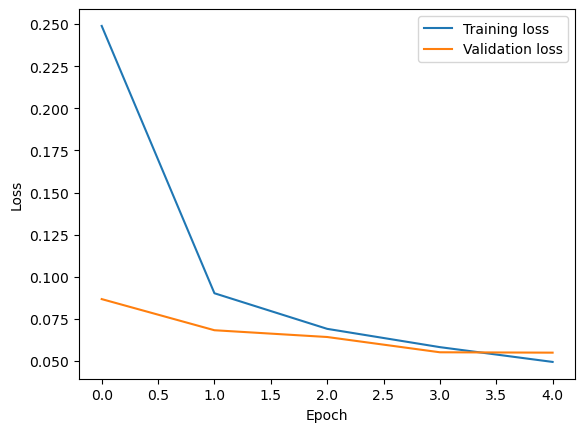

In [19]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

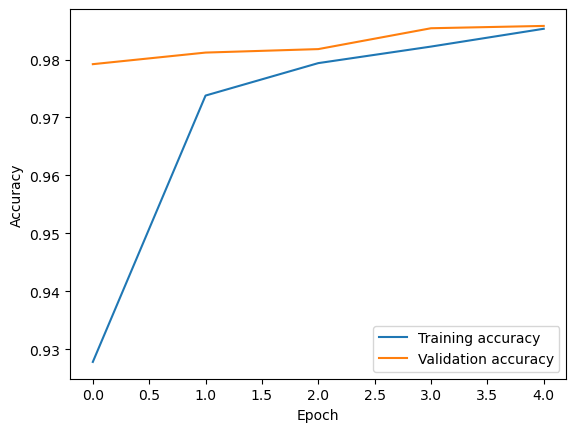

In [20]:
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()